# Cork South Link Road - PM10 100 removed

# Import Necessary Packages

In [2]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, RobustScaler, FunctionTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# imports necessary for dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn import svm
from sklearn.decomposition import FastICA
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import FactorAnalysis
# regression algorithms
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.svm import SVR

# metrics for evaluating regression models
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, median_absolute_error, explained_variance_score, max_error

from time import process_time

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from yellowbrick.regressor import PredictionError

from sklearn.neural_network import MLPRegressor

# Import Raw Data

In [3]:
df = pd.read_csv('./Cork Airport Met and Pollutant Data 17-19 (Rows Deleted and Hour Fixed).csv', thousands=',', low_memory=False)
# You can also open with Excel and take a look at it.

In [4]:
df = df.dropna(axis=0)

In [5]:
df.head(5)

Date  Hour  indrain  rain  indtemp  temp  indwetb  wetb  \
15568  10/11/2018 16:00    16        0   0.0        0  12.5        0  10.1   
15569  10/11/2018 17:00    17        0   0.0        0  11.9        0  10.0   
15570  10/11/2018 18:00    18        0   0.0        0  11.1        0   9.7   
15571  10/11/2018 19:00    19        0   0.0        0  11.3        0   9.9   
15572  10/11/2018 20:00    20        0   0.0        0  12.0        0  10.7   

       dewpt  vappr  ...   w  sun    vis  clht  clamt  Ozone  SO2   NO2   CO  \
15568    7.5   10.4  ...  11  0.9  60000   999      2   42.6  3.0  35.1  0.3   
15569    8.1   10.8  ...  11  0.5  50000   999      1   49.2  2.2  20.1  0.2   
15570    8.2   10.9  ...  81  0.0  40000   999      4   57.0  2.2   9.2  0.2   
15571    8.4   11.1  ...  11  0.0  30000   999      4   64.4  2.2   6.5  0.2   
15572    9.4   11.8  ...  11  0.0  25000    18      7   66.6  2.2   5.3  0.2   

       PM10  
15568  33.4  
15569    26  
15570    17  
15571    18  
15572    14  

[5 rows x 27 columns]

In [6]:
df.tail(5)

Date  Hour  indrain  rain  indtemp  temp  indwetb  wetb  \
25419  31/12/2019 05:00     5        2   0.0        0   8.0        0   7.7   
25420  31/12/2019 06:00     6        0   0.0        0   8.1        0   7.8   
25421  31/12/2019 07:00     7        0   0.0        0   8.1        0   7.8   
25422  31/12/2019 08:00     8        2   0.0        0   8.1        0   7.9   
25423  31/12/2019 09:00     9        2   0.0        0   7.9        0   7.6   

       dewpt  vappr  ...   w  sun    vis  clht  clamt  Ozone  SO2   NO2   CO  \
25419    7.3   10.3  ...  52  0.0  20000    20      7  59.67  1.9   4.4  0.3   
25420    7.4   10.3  ...  52  0.0  20000     5      7  57.28  2.1   7.8  0.3   
25421    7.5   10.3  ...  11  0.0  18000     4      7  51.49  2.1   5.2  0.3   
25422    7.6   10.5  ...  52  0.0  12000     4      7  51.09  2.1   7.4  0.3   
25423    7.3   10.2  ...  65  0.0   7000     4      8  51.29  2.4  14.7  0.3   

       PM10  
25419     8  
25420    16  
25421    16  
25422    19  
25423    13  

[5 rows x 27 columns]

# Clean data based on Meteorological Indicators

In [7]:
df['indrain'].value_counts()

0    5561
3    1220
2     903
1      22
Name: indrain, dtype: int64

In [8]:
df['indtemp'].value_counts()

0    7684
1      22
Name: indtemp, dtype: int64

In [9]:
df['indwetb'].value_counts()

0    7641
1      47
5      18
Name: indwetb, dtype: int64

In [10]:
df['indwdsp'].value_counts()

2    7706
Name: indwdsp, dtype: int64

In [11]:
df['indwddir'].value_counts()

2    7706
Name: indwddir, dtype: int64

In [12]:
#Code to remove the junk data row
import csv

with open('./Cork Airport Met and Pollutant Data 17-19 (Rows Deleted and Hour Fixed).csv', 'r') as fin, open('Cork_FileforML.csv', 'w', newline='') as fout:

    # define reader and writer objects
    reader = csv.reader(fin, skipinitialspace=True)
    writer = csv.writer(fout, delimiter=',')

    # write headers
    writer.writerow(next(reader))

    # iterate and write rows based on condition
    for i in reader:
        if int(i[2]) == 0 and int(i[4]) == 0 and int(i[6]) == 0:
            writer.writerow(i)
            
Cdf = pd.read_csv('Cork_FileforML.csv', thousands=',', low_memory=False)

In [13]:
Cdf = Cdf.dropna(axis=0)
print("Length of Data is: {}".format(len(Cdf)))

Length of Data is: 5520


In [14]:
Cdf.head(5)

Date  Hour  indrain  rain  indtemp  temp  indwetb  wetb  \
11427  10/11/2018 16:00    16        0   0.0        0  12.5        0  10.1   
11428  10/11/2018 17:00    17        0   0.0        0  11.9        0  10.0   
11429  10/11/2018 18:00    18        0   0.0        0  11.1        0   9.7   
11430  10/11/2018 19:00    19        0   0.0        0  11.3        0   9.9   
11431  10/11/2018 20:00    20        0   0.0        0  12.0        0  10.7   

       dewpt  vappr  ...   w  sun    vis  clht  clamt  Ozone  SO2   NO2   CO  \
11427    7.5   10.4  ...  11  0.9  60000   999      2   42.6  3.0  35.1  0.3   
11428    8.1   10.8  ...  11  0.5  50000   999      1   49.2  2.2  20.1  0.2   
11429    8.2   10.9  ...  81  0.0  40000   999      4   57.0  2.2   9.2  0.2   
11430    8.4   11.1  ...  11  0.0  30000   999      4   64.4  2.2   6.5  0.2   
11431    9.4   11.8  ...  11  0.0  25000    18      7   66.6  2.2   5.3  0.2   

       PM10  
11427  33.4  
11428  26.0  
11429  17.0  
11430  18.0  
11431  14.0  

[5 rows x 27 columns]

# Check Datatypes

In [15]:
Cdf.dtypes #Look at the datatypes

Date         object
Hour          int64
indrain       int64
rain        float64
indtemp       int64
temp        float64
indwetb       int64
wetb        float64
dewpt       float64
vappr       float64
rhum          int64
msl         float64
indwdsp       int64
wdsp          int64
indwddir      int64
wddir         int64
ww            int64
w             int64
sun         float64
vis           int64
clht          int64
clamt         int64
Ozone       float64
SO2         float64
NO2         float64
CO          float64
PM10        float64
dtype: object

In [16]:
Cdf['Date'] = Cdf['Date'].astype('datetime64') #Change the datatype of the date column (used for selecting timeframes later)
#df['Ozone'] = df['Ozone'].astype('float')

In [17]:
Cdf.dtypes

Date        datetime64[ns]
Hour                 int64
indrain              int64
rain               float64
indtemp              int64
temp               float64
indwetb              int64
wetb               float64
dewpt              float64
vappr              float64
rhum                 int64
msl                float64
indwdsp              int64
wdsp                 int64
indwddir             int64
wddir                int64
ww                   int64
w                    int64
sun                float64
vis                  int64
clht                 int64
clamt                int64
Ozone              float64
SO2                float64
NO2                float64
CO                 float64
PM10               float64
dtype: object

# Function to select time periods

In [18]:
#This code creates a functions to create a dataframe of Met and pollutant data for a certain period between the two dates
#May be useful later
def Yeardf(Date1, Date2):
    import datetime
    Sorteddf = df[(df['Date'] > Date1) & (df['Date']< Date2)]
    print(Sorteddf)
    
Yeardf("2015-01-01", "2016-01-01")

Empty DataFrame
Columns: [Date, Hour, indrain, rain, indtemp, temp, indwetb, wetb, dewpt, vappr, rhum, msl, indwdsp, wdsp, indwddir, wddir, ww, w, sun, vis, clht, clamt, Ozone, SO2, NO2, CO, PM10]
Index: []

[0 rows x 27 columns]


In [19]:
#Let's plot
from matplotlib.pyplot import figure

def PlotFeature(Name, Data1):
    
    Feature = []
    Feature = Data1[Name].values

    Date = []
    Date = Data1['Date'].values

    N_data = len(Data1)
    N = np.zeros(N_data)

    for i in range(N_data):
        N[i] = i
        
    
    Plotsdf = pd.DataFrame(list(zip(Date, Feature)), columns=['Date', Name])
    
    #Plotsdf['SMA_5 PM10 Act'] = Plotsdf.PM10_Actual_Values.rolling(5, min_periods=0).mean()
    #Plotsdf['SMA_5 PM10 Pred'] = Plotsdf.PM10_Predicted_Values.rolling(5, min_periods=0).mean()
    #print(len(PM10))
    #print(len(N))

    figure(figsize=(25, 10))
    
    
    Plotsdf.plot(x='Date', y=Name, linewidth=0.7, figsize=(25, 10), color=['red'])
    plt.title("Graph of {} for 2018-2019".format(Name), fontsize=30)
    plt.xlabel("Date", fontsize=30)
    plt.ylabel("Value ($\mu g / m^{3}$)", fontsize=30)
    plt.legend(fontsize=20)
    plt.show()
    
PlotFeature('PM10', df)
PlotFeature('Ozone', df)
PlotFeature('NO2', df)
PlotFeature('SO2', df)
PlotFeature('CO', df)


TypeError: Empty 'DataFrame': no numeric data to plot

<Figure size 1800x720 with 0 Axes>

5164


<Figure size 1800x720 with 0 Axes>

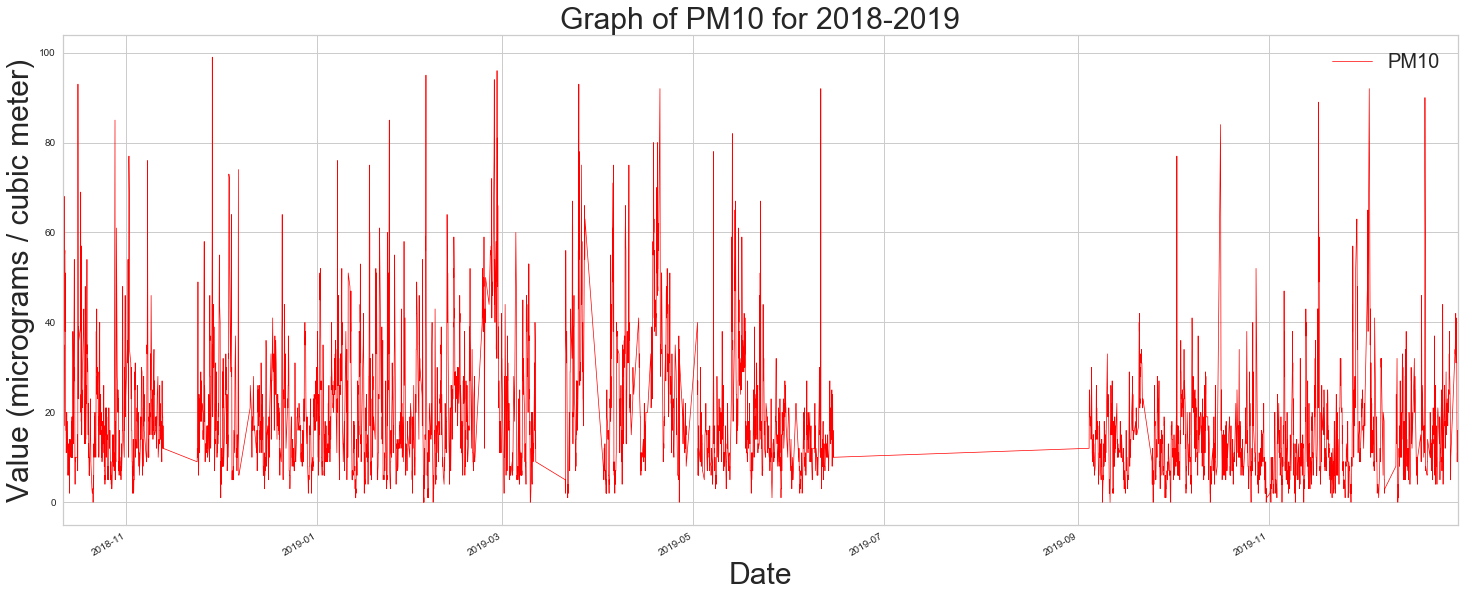

<Figure size 1800x720 with 0 Axes>

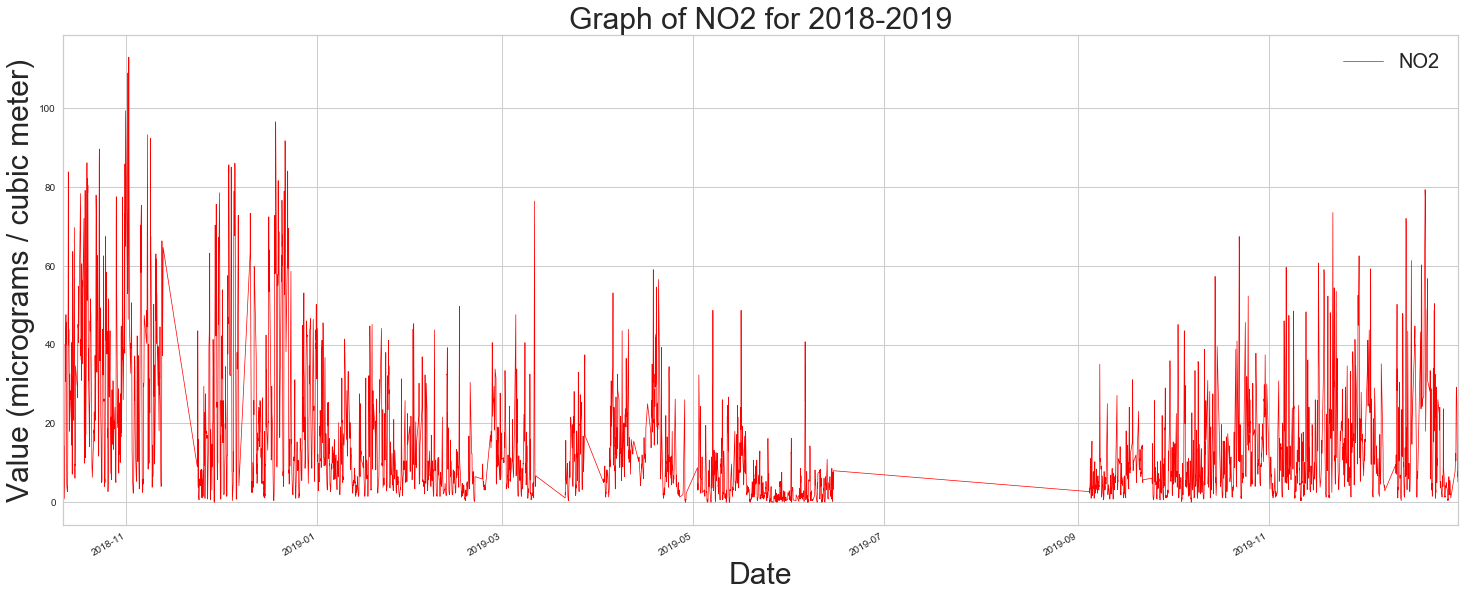

<Figure size 1800x720 with 0 Axes>

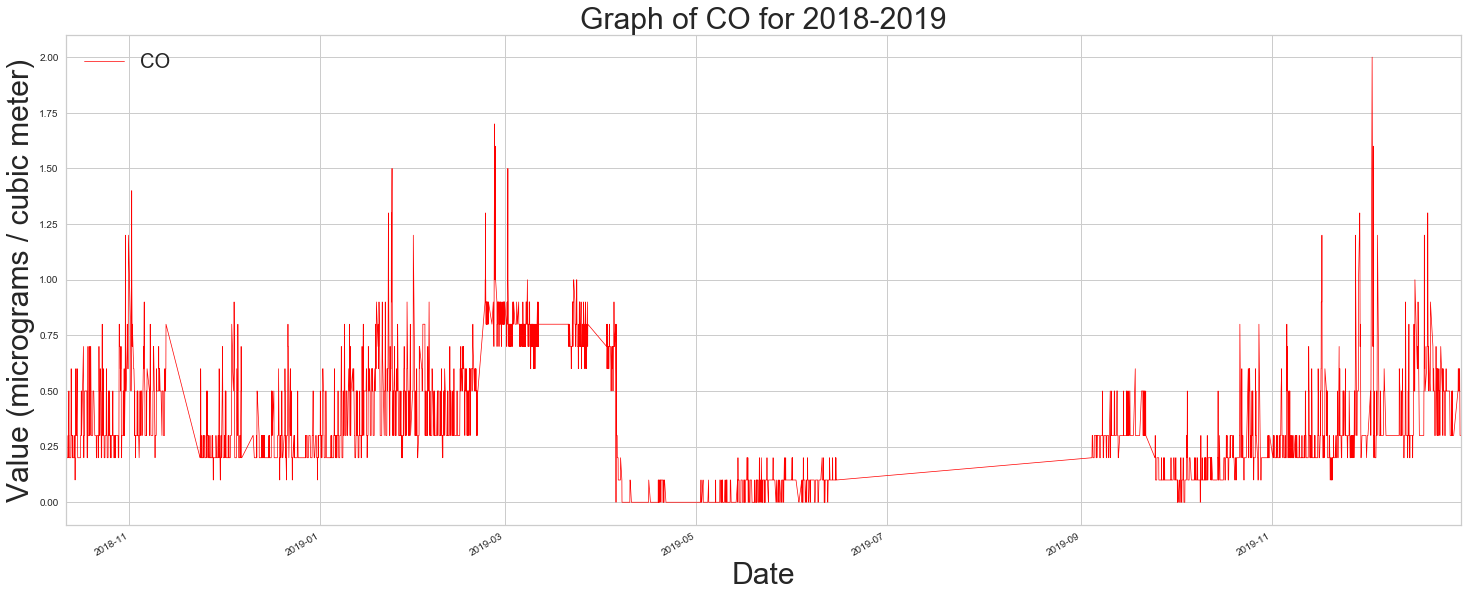

<Figure size 1800x720 with 0 Axes>

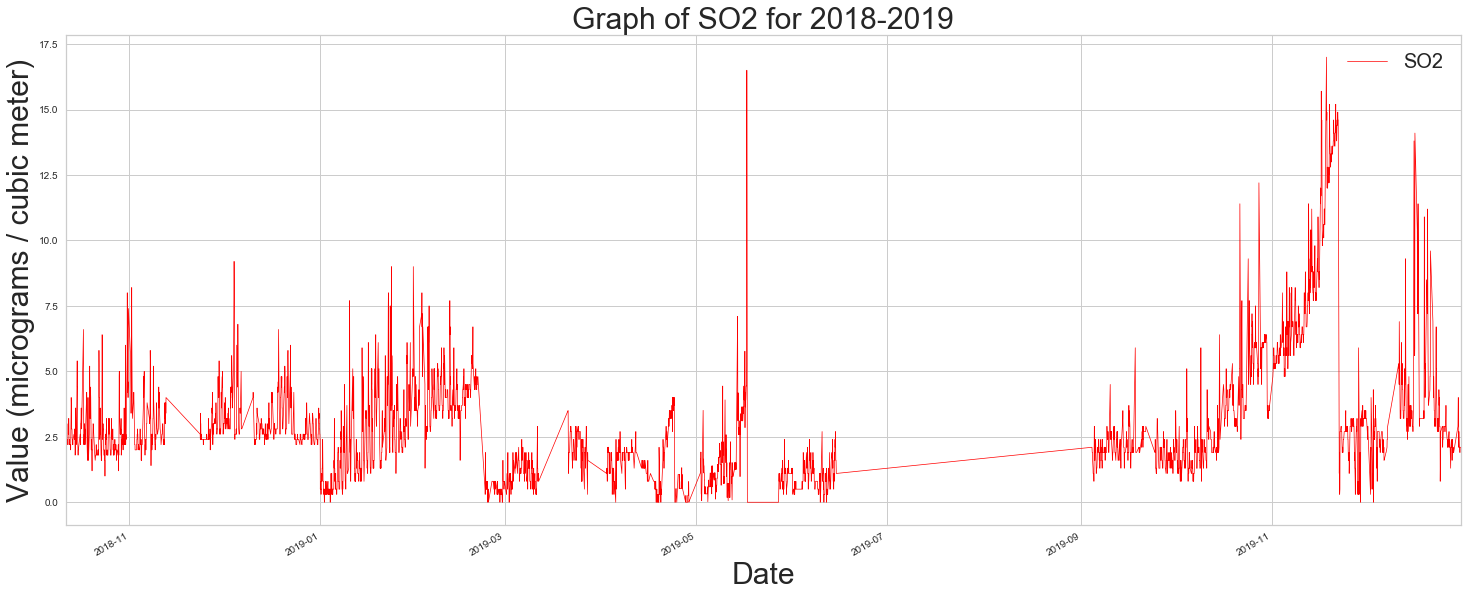

<Figure size 1800x720 with 0 Axes>

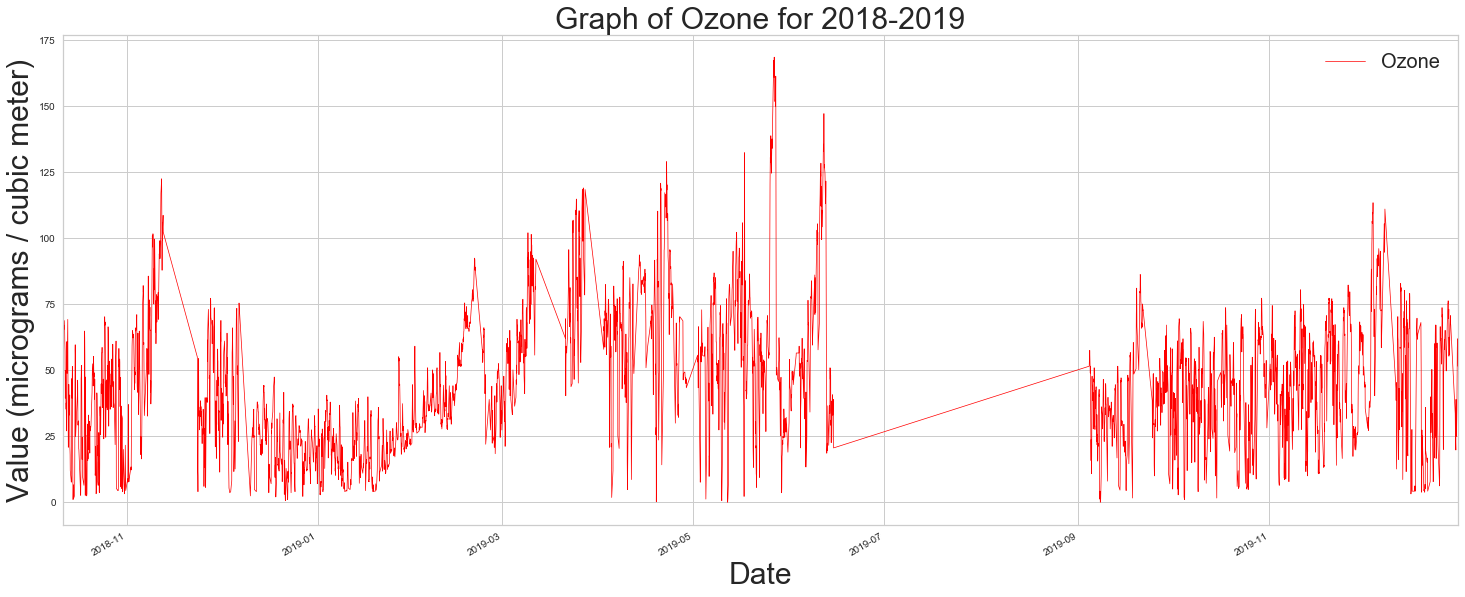

In [20]:
Posdf = Cdf[(Cdf['SO2'] >= 0) & (Cdf['Ozone'] >= 0) & (Cdf['NO2'] >= 0) & (Cdf['CO'] >= 0) & (Cdf['PM10'] >= 0) & (Cdf['PM10'] <= 100)]

print(len(Posdf))

PlotFeature('PM10', Posdf)
PlotFeature('NO2', Posdf)
PlotFeature('CO', Posdf)
PlotFeature('SO2', Posdf)
PlotFeature('Ozone', Posdf)


In [21]:
Posdf.head()

Date  Hour  indrain  rain  indtemp  temp  indwetb  wetb  \
11427 2018-10-11 16:00:00    16        0   0.0        0  12.5        0  10.1   
11428 2018-10-11 17:00:00    17        0   0.0        0  11.9        0  10.0   
11429 2018-10-11 18:00:00    18        0   0.0        0  11.1        0   9.7   
11430 2018-10-11 19:00:00    19        0   0.0        0  11.3        0   9.9   
11431 2018-10-11 20:00:00    20        0   0.0        0  12.0        0  10.7   

       dewpt  vappr  ...   w  sun    vis  clht  clamt  Ozone  SO2   NO2   CO  \
11427    7.5   10.4  ...  11  0.9  60000   999      2   42.6  3.0  35.1  0.3   
11428    8.1   10.8  ...  11  0.5  50000   999      1   49.2  2.2  20.1  0.2   
11429    8.2   10.9  ...  81  0.0  40000   999      4   57.0  2.2   9.2  0.2   
11430    8.4   11.1  ...  11  0.0  30000   999      4   64.4  2.2   6.5  0.2   
11431    9.4   11.8  ...  11  0.0  25000    18      7   66.6  2.2   5.3  0.2   

       PM10  
11427  33.4  
11428  26.0  
11429  17.0  
11430  18.0  
11431  14.0  

[5 rows x 27 columns]

In [22]:
Posdf.drop('Date', axis=1, inplace=True)

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [23]:
Posdf.drop('indrain', axis=1, inplace=True)

In [24]:
Posdf.drop('indtemp', axis=1, inplace=True)

In [25]:
Posdf.drop('indwetb', axis=1, inplace=True)

In [26]:
Posdf.drop('indwdsp', axis=1, inplace=True)

In [27]:
Posdf.drop('indwddir', axis=1, inplace=True)

# Let's look at the data for algorithm

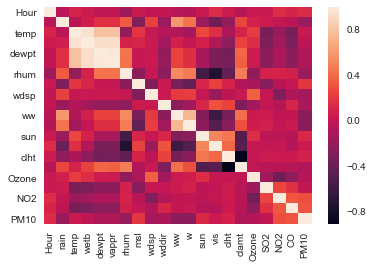

In [28]:
#Heatmap
sns.heatmap(Posdf.corr());

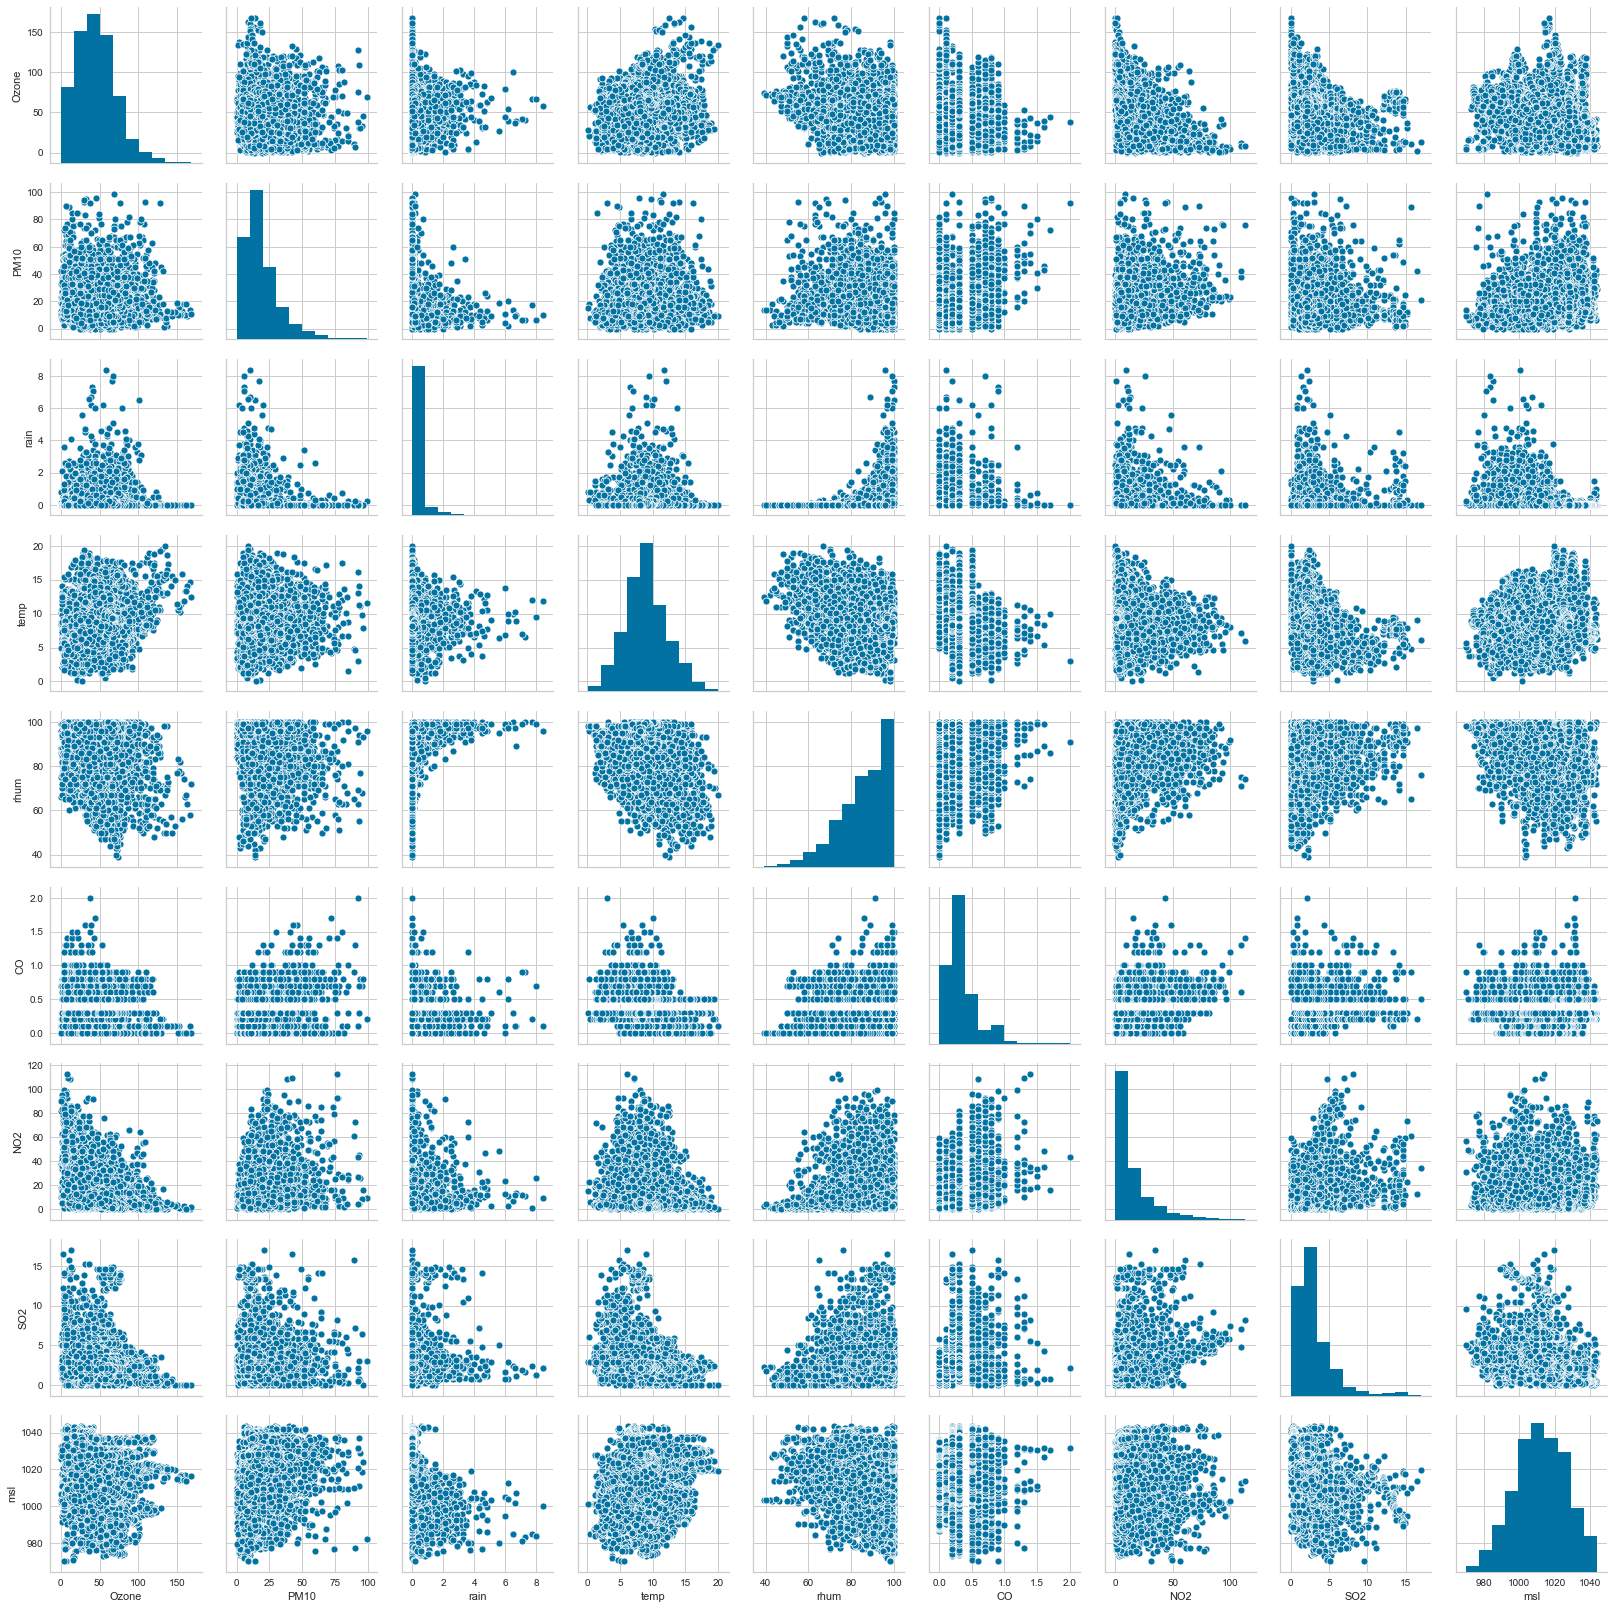

In [29]:
# note that by applying the method dropna() we drop all rows with missing values 
sns.pairplot(data=Posdf[['Ozone','PM10','rain','temp','rhum', 'CO', 'NO2', 'SO2', 'msl']].dropna())
plt.show()

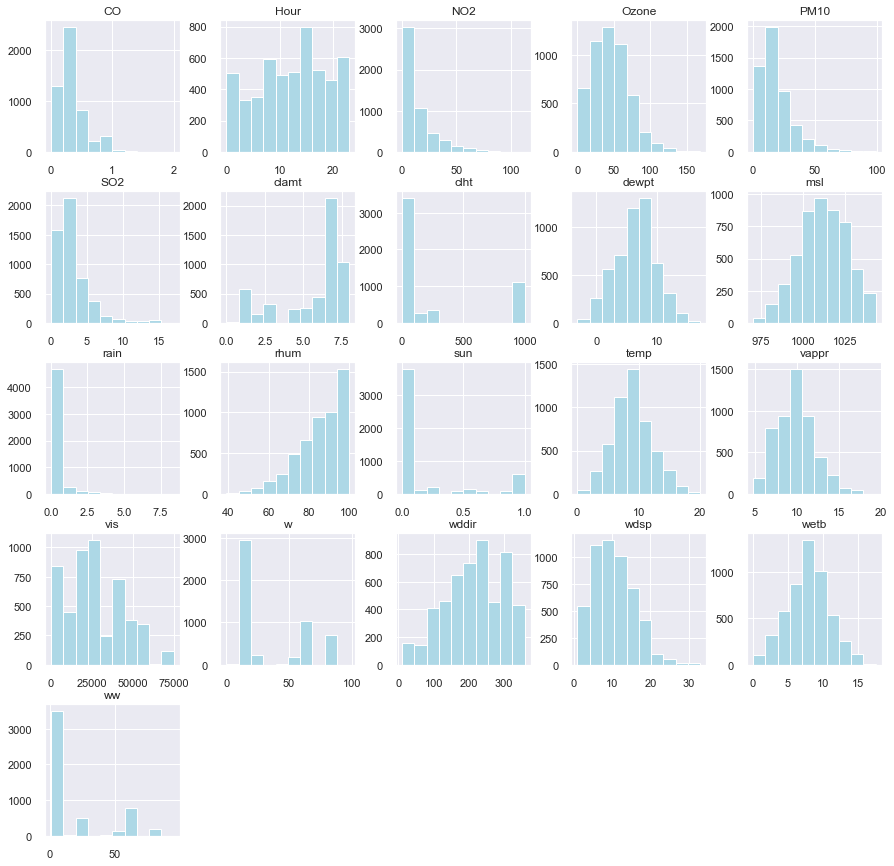

In [30]:
#Histograms
sns.set()
pd.DataFrame.hist(Posdf, figsize = [15,15], color='lightblue')
plt.show()

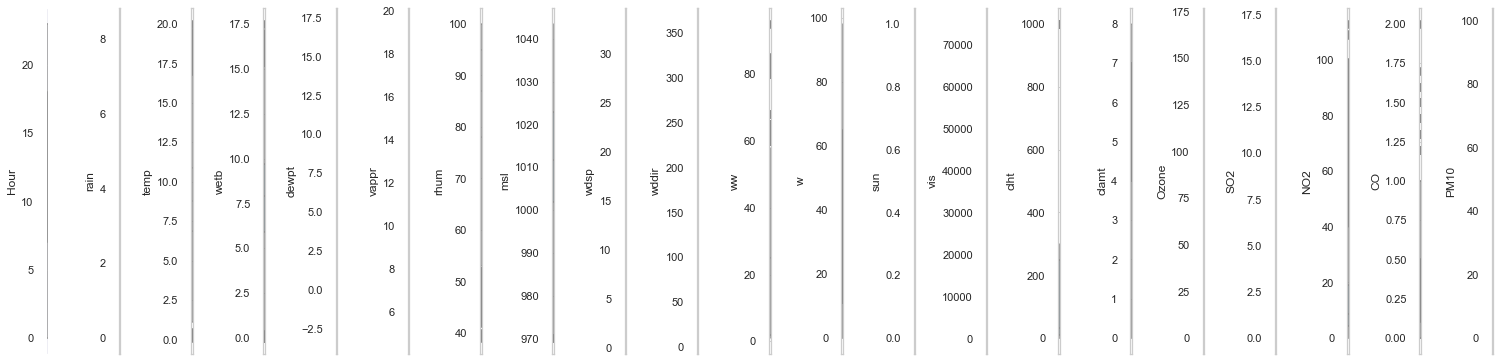

In [31]:
l = Posdf.columns.values
number_of_columns=21
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(Posdf[l[i]],color='lightblue',orient='v')
    plt.tight_layout()

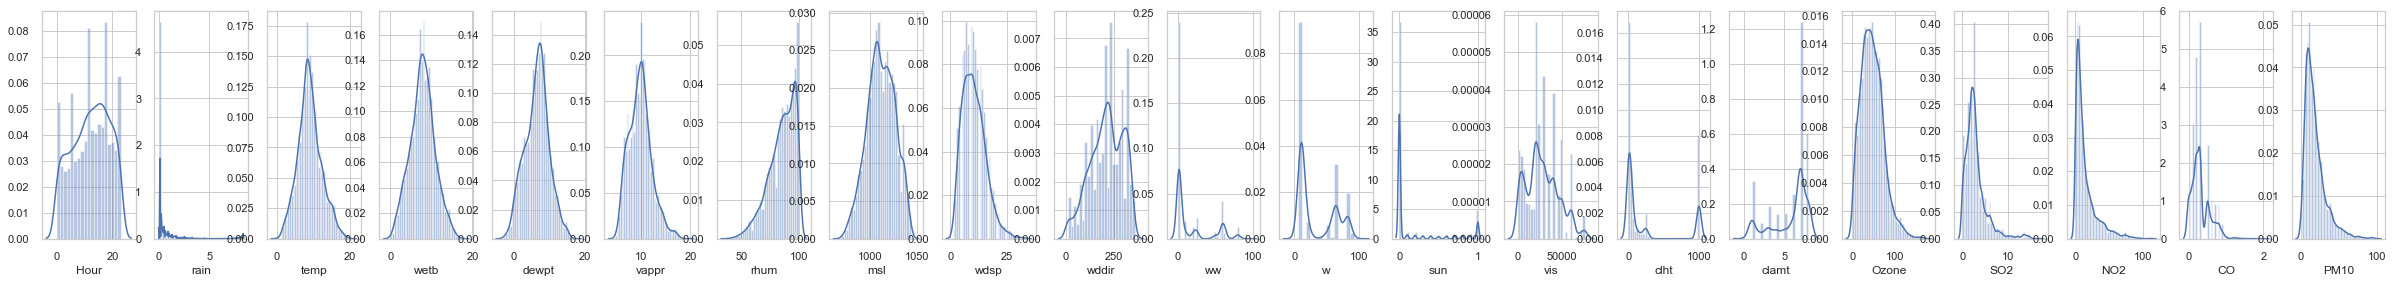

In [32]:
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(Posdf[l[i]],kde=True)

In [33]:
Posdf.describe()

Hour         rain         temp         wetb        dewpt  \
count  5164.000000  5164.000000  5164.000000  5164.000000  5164.000000   
mean     12.254454     0.235108     8.983966     7.855945     6.497076   
std       6.536740     0.661732     3.203342     2.972395     3.350690   
min       0.000000     0.000000     0.100000     0.000000    -3.100000   
25%       7.000000     0.000000     6.900000     5.900000     4.200000   
50%      13.000000     0.000000     8.800000     7.900000     6.800000   
75%      18.000000     0.100000    10.900000     9.700000     8.700000   
max      23.000000     8.400000    20.000000    17.500000    17.100000   

             vappr         rhum          msl         wdsp        wddir  ...  \
count  5164.000000  5164.000000  5164.000000  5164.000000  5164.000000  ...   
mean      9.907262    85.308869  1011.985612    10.440163   212.931836  ...   
std       2.281628    11.526493    14.541589     5.080954    83.839230  ...   
min       4.800000    39.000000   970.100000     1.000000    10.000000  ...   
25%       8.200000    78.000000  1001.900000     7.000000   150.000000  ...   
50%       9.900000    87.000000  1011.700000    10.000000   220.000000  ...   
75%      11.200000    95.000000  1023.000000    14.000000   280.000000  ...   
max      19.400000   100.000000  1043.500000    33.000000   360.000000  ...   

                 w          sun           vis         clht        clamt  \
count  5164.000000  5164.000000   5164.000000  5164.000000  5164.000000   
mean     33.708947     0.178699  28036.812548   257.905500     5.805577   
std      28.813141     0.342857  17886.953165   396.269991     2.298000   
min       0.000000     0.000000    100.000000     1.000000     0.000000   
25%      11.000000     0.000000  16000.000000    11.000000     4.000000   
50%      11.000000     0.000000  25000.000000    34.000000     7.000000   
75%      65.000000     0.100000  40000.000000   250.000000     7.000000   
max      98.000000     1.000000  75000.000000   999.000000     8.000000   

             Ozone          SO2          NO2           CO         PM10  
count  5164.000000  5164.000000  5164.000000  5164.000000  5164.000000  
mean     45.988625     2.908404    14.698439     0.310844    18.554299  
std      25.771554     2.404406    16.124772     0.243598    13.648159  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%      27.200000     1.510000     4.200000     0.100000     9.000000  
50%      43.755000     2.400000     8.800000     0.300000    15.000000  
75%      62.070000     3.500000    19.100000     0.500000    24.000000  
max     168.440000    17.000000   112.900000     2.000000    99.000000  

[8 rows x 21 columns]

In [34]:
print('Length of Original cleaned df: {}'.format(len(df)))
print('Length of positive cleaned df: {}'.format(len(Posdf)))

Length of Original cleaned df: 7706
Length of positive cleaned df: 5164


# Adjust data to avoid zero's

In [35]:
Posdf['Hour'] = Posdf['Hour']+1.00
Posdf['rain'] = Posdf['rain']+1.00
Posdf['temp'] = Posdf['temp']+1.00
Posdf['vappr'] = Posdf['vappr']+1.00
Posdf['rhum'] = Posdf['rhum']+1.00
Posdf['wetb'] = Posdf['wetb']+1.00
Posdf['dewpt'] = Posdf['dewpt']+4.1
Posdf['msl'] = Posdf['msl']/1000
Posdf['CO'] = Posdf['CO']+1.00
Posdf['NO2'] = Posdf['NO2']+1.00
Posdf['SO2'] = Posdf['SO2']+1.00
Posdf['Ozone'] = Posdf['Ozone']+1.00
Posdf['PM10'] = Posdf['PM10']+1.00
Posdf['clamt'] = Posdf['clamt']+1.00
Posdf['sun'] = Posdf['sun']+1.00
Posdf['w'] = Posdf['w']+1.00
Posdf['ww'] = Posdf['ww']+1.00
Posdf['wddir'] = Posdf['wddir']/360 + 1.00
Posdf['wdsp'] = Posdf['wdsp'] + 1.00

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyd

In [36]:
Posdf.describe()

Hour         rain         temp         wetb        dewpt  \
count  5164.000000  5164.000000  5164.000000  5164.000000  5164.000000   
mean     13.254454     1.235108     9.983966     8.855945    10.597076   
std       6.536740     0.661732     3.203342     2.972395     3.350690   
min       1.000000     1.000000     1.100000     1.000000     1.000000   
25%       8.000000     1.000000     7.900000     6.900000     8.300000   
50%      14.000000     1.000000     9.800000     8.900000    10.900000   
75%      19.000000     1.100000    11.900000    10.700000    12.800000   
max      24.000000     9.400000    21.000000    18.500000    21.200000   

             vappr         rhum          msl         wdsp        wddir  ...  \
count  5164.000000  5164.000000  5164.000000  5164.000000  5164.000000  ...   
mean     10.907262    86.308869     1.011986    11.440163     1.591477  ...   
std       2.281628    11.526493     0.014542     5.080954     0.232887  ...   
min       5.800000    40.000000     0.970100     2.000000     1.027778  ...   
25%       9.200000    79.000000     1.001900     8.000000     1.416667  ...   
50%      10.900000    88.000000     1.011700    11.000000     1.611111  ...   
75%      12.200000    96.000000     1.023000    15.000000     1.777778  ...   
max      20.400000   101.000000     1.043500    34.000000     2.000000  ...   

                 w          sun           vis         clht        clamt  \
count  5164.000000  5164.000000   5164.000000  5164.000000  5164.000000   
mean     34.708947     1.178699  28036.812548   257.905500     6.805577   
std      28.813141     0.342857  17886.953165   396.269991     2.298000   
min       1.000000     1.000000    100.000000     1.000000     1.000000   
25%      12.000000     1.000000  16000.000000    11.000000     5.000000   
50%      12.000000     1.000000  25000.000000    34.000000     8.000000   
75%      66.000000     1.100000  40000.000000   250.000000     8.000000   
max      99.000000     2.000000  75000.000000   999.000000     9.000000   

             Ozone          SO2          NO2           CO         PM10  
count  5164.000000  5164.000000  5164.000000  5164.000000  5164.000000  
mean     46.988625     3.908404    15.698439     1.310844    19.554299  
std      25.771554     2.404406    16.124772     0.243598    13.648159  
min       1.000000     1.000000     1.000000     1.000000     1.000000  
25%      28.200000     2.510000     5.200000     1.100000    10.000000  
50%      44.755000     3.400000     9.800000     1.300000    16.000000  
75%      63.070000     4.500000    20.100000     1.500000    25.000000  
max     169.440000    18.000000   113.900000     3.000000   100.000000  

[8 rows x 21 columns]

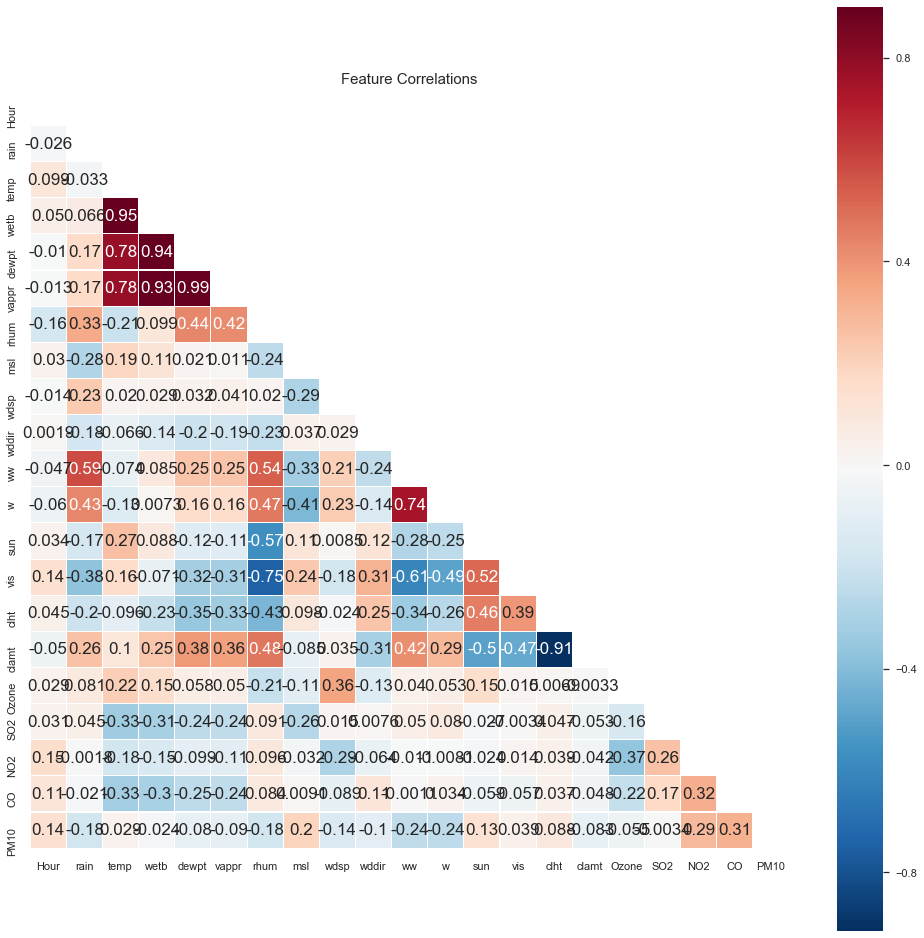

In [37]:
mask = np.zeros_like(Posdf.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.subplots(figsize = (17,17))
sns.heatmap(Posdf.corr(), 
            annot=True,
            mask = mask,
            cmap = 'RdBu_r',
            linewidths=0.1, 
            linecolor='white',
            vmax = .9,
            square=True,
            annot_kws={"size":17})
plt.title("Feature Correlations", y = 1.4,fontsize = 15)
plt.rcParams['axes.labelsize'] = 15
import matplotlib as mpl
label_size = 26
mpl.rcParams['xtick.labelsize'] = label_size
mpl.rcParams['ytick.labelsize'] = label_size
plt.show()

In [38]:
Posdf.drop('wetb', axis=1, inplace=True)

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [39]:
Posdf.drop('dewpt', axis=1, inplace=True)

In [40]:
Posdf.drop('vappr', axis=1, inplace=True)

In [41]:
Posdf.drop('rhum', axis=1, inplace=True)

In [42]:
Posdf.drop('ww', axis=1, inplace=True)

In [43]:
Posdf.drop('w', axis=1, inplace=True)

In [44]:
Posdf.drop('clamt', axis=1, inplace=True)

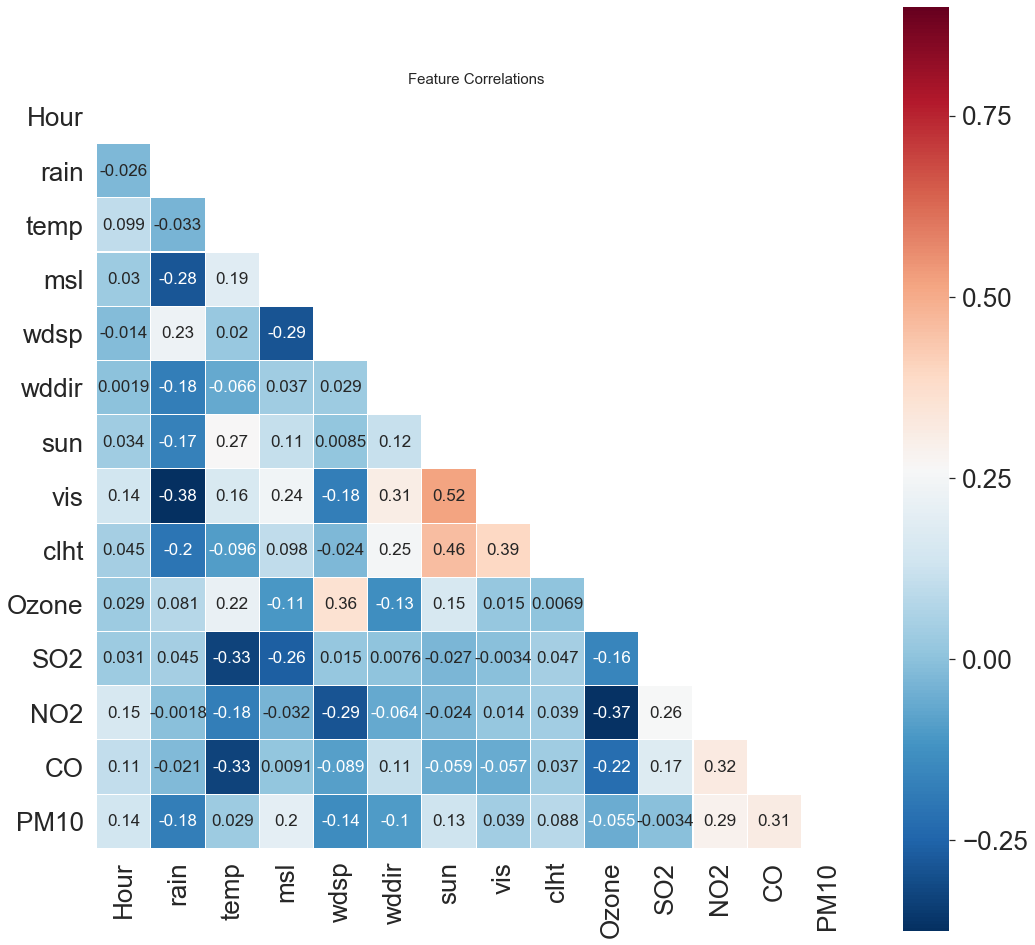

In [45]:
mask = np.zeros_like(Posdf.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.subplots(figsize = (17,17))
sns.heatmap(Posdf.corr(), 
            annot=True,
            mask = mask,
            cmap = 'RdBu_r',
            linewidths=0.1, 
            linecolor='white',
            vmax = .9,
            square=True,
            annot_kws={"size":17})
plt.title("Feature Correlations", y = 1.4,fontsize = 15)
plt.rcParams['axes.labelsize'] = 15
import matplotlib as mpl
label_size = 26
mpl.rcParams['xtick.labelsize'] = label_size
mpl.rcParams['ytick.labelsize'] = label_size
plt.show()

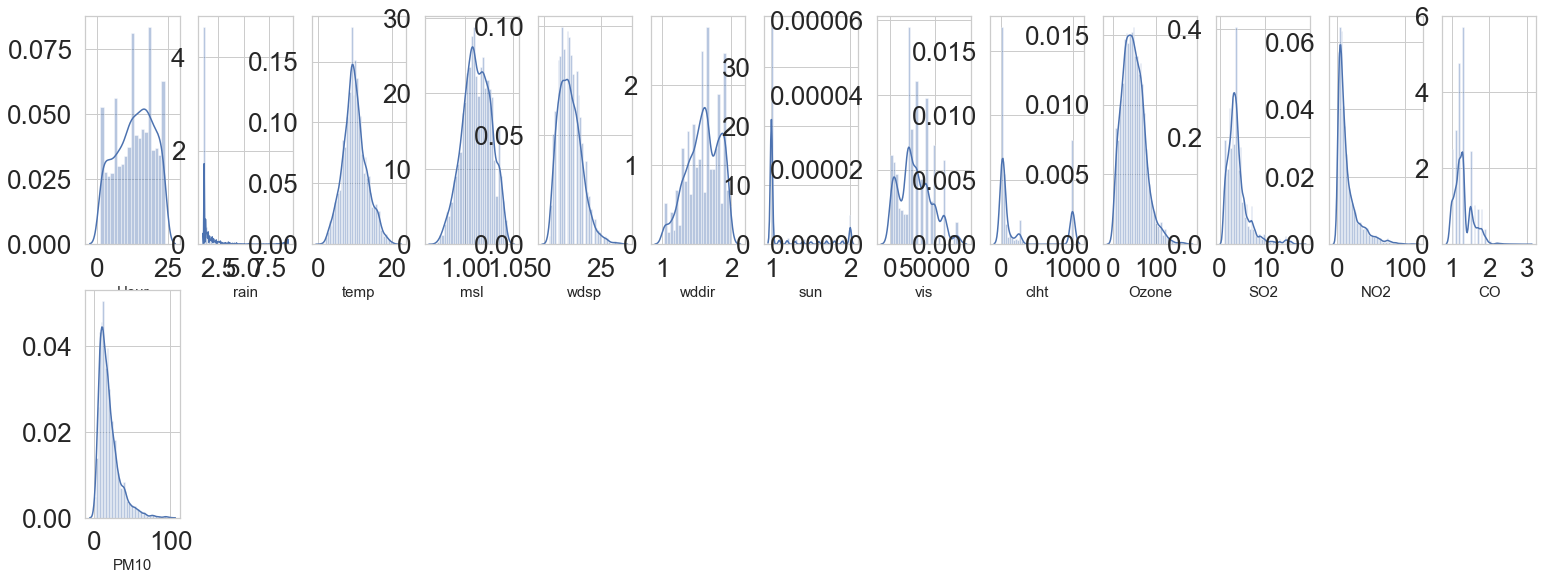

In [46]:
l = Posdf.columns.values
number_of_columns=13
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(Posdf[l[i]],kde=True)

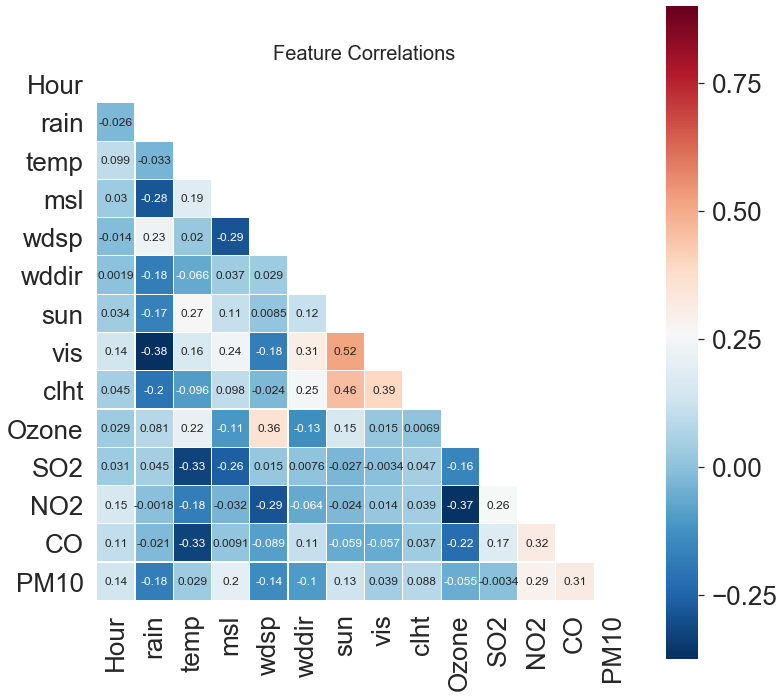

In [47]:
mask = np.zeros_like(Posdf.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.subplots(figsize = (12,12))
sns.heatmap(Posdf.corr(), 
            annot=True,
            mask = mask,
            cmap = 'RdBu_r',
            linewidths=0.1, 
            linecolor='white',
            vmax = .9,
            square=True)
plt.title("Feature Correlations", y = 1.03,fontsize = 20)
plt.show()

# Create the target dataframes and define functions called in the process of running the algorithms

In [48]:
Basedf = Posdf[['Hour', 'rain', 'temp', 'msl', 'wdsp', 'wddir', 'Ozone', 'PM10']].copy()
Pollutantdf = Posdf[['Hour', 'rain', 'temp', 'msl', 'wdsp', 'wddir', 'NO2', 'SO2', 'Ozone', 'CO', 'PM10']].copy()
dfnowd = Posdf[['Hour', 'rain', 'temp', 'msl', 'NO2', 'SO2', 'Ozone', 'CO', 'PM10']].copy()

In [49]:
def evaluate_model(X_test, y_test, model):
    
    # compute predictiond for the test set
    _predicted_values = model.predict(X_test)
    # compute metrics
    _mse = mean_squared_error(y_test, _predicted_values)
    _mae = mean_absolute_error(y_test, _predicted_values)
    _r2 = r2_score(y_test, _predicted_values)
    _meae = median_absolute_error(y_test, _predicted_values)
    _evs = explained_variance_score(y_test, _predicted_values)
    _me = max_error(y_test, _predicted_values)      
    return _mse, _mae, _r2, _meae, _evs, _me

In [50]:
class AddColumnNames(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return pd.DataFrame(data=X, columns=self.columns)

In [51]:
class ColumnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        assert isinstance(X, pd.DataFrame)
        return X[self.columns]

# Functions to conduct Algorithms

# Random Forest Regressor

In [52]:
%%time

def RandomForest(Name, N_Year, N, printCV, printgraph, N_Features, Max_Depth, ratio, Addfeature):
    
    Data = N_Year
    
    # store a list with the names of all predictors we'll try PM10 first
    names_all = [c for c in Data if c not in ['PM10']]

    column_list = Data.columns.values.tolist()
    Removed        = column_list.pop(-1)
    
    # define column groups with the same data preparation
    names_outliers = column_list
    print(names_outliers)
    names_no_outliers = list(set(names_all) - set(names_outliers))
    
    y = Data['PM10']
    X = Data.drop('PM10', axis=1).values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio, shuffle=True)
    
    preprocess_pipeline = make_pipeline(
    AddColumnNames(columns=names_all),
    FeatureUnion(transformer_list=[
        ("outlier_columns", make_pipeline(
            ColumnSelector(columns=names_outliers),
            FunctionTransformer(np.log, validate=True),
            RobustScaler()
        )),
        ("no_outlier_columns", make_pipeline(
            ColumnSelector(columns=names_outliers),
            FunctionTransformer(np.log, validate=True),
            RobustScaler()  
        ))
    ])
)
   
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio, shuffle=True)
    #X_train, y_train = X, y
    
    pipe = Pipeline(steps=[('preprocess', preprocess_pipeline), 
                       ('reduce_dim', 'passthrough'),
                        ('regresson', RandomForestRegressor(n_estimators=100))])

    
    #print(len(Data))
    
    
    N_FEATURES_OPTIONS = [N_Features]
    MAX_DEPTH_OPTIONS = [Max_Depth]

    param_grid = [
        {
            'reduce_dim': [PCA(iterated_power=7)],
            'reduce_dim__n_components': N_FEATURES_OPTIONS,
            'regresson__max_depth': MAX_DEPTH_OPTIONS
        },
        {
            'reduce_dim': [RFE(svm.SVR(kernel='linear', gamma='auto')),RFE(LinearRegression())],
            'reduce_dim__n_features_to_select': N_FEATURES_OPTIONS,
            'regresson__max_depth': MAX_DEPTH_OPTIONS
        },
        {
            'reduce_dim': [FastICA( algorithm='deflation')],
            'reduce_dim__n_components': N_FEATURES_OPTIONS,
            'regresson__max_depth': MAX_DEPTH_OPTIONS
        },
        {
            'reduce_dim': [TruncatedSVD(algorithm='randomized'), TruncatedSVD(algorithm='arpack')],
            'reduce_dim__n_components': N_FEATURES_OPTIONS
        },
    ]    

    search = GridSearchCV(pipe, param_grid, cv=10, iid = False, refit=True)
    search.fit(X_train, y_train)

    if printCV == 0:
        print("Best CV score = %0.3f:" % search.best_score_)
        print("Best parameters: ", search.best_params_)
    
        
 
    # store the best params and best model for later use
    RF_best_params = search.best_params_
    RF_best_model = search.best_estimator_
    
    if printgraph == 0:
        model = RandomForestRegressor()
        visualizer = PredictionError(model)

        visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        visualizer.show()                 # Finalize and render the figure
    
    RF_mse, RF_mae, RF_r2, RF_meae, RF_evs, RF_me = evaluate_model(X_test, y_test, RF_best_model)
    
    Title = np.array([Name])
    Range = np.array([N])
    Features = np.array([N_Features])
    Depth = np.array([Max_Depth])
    Split = np.array([ratio])
    Add = np.array([Addfeature])
    MSE  = np.array([RF_mse])
    MAE  = np.array([RF_mae])
    R2   = np.array([RF_r2])
    MEAE = np.array([RF_meae])
    ME   = np.array([RF_me])
    
    #Predictions = model.predict(X_test)
    Modeldf = pd.DataFrame(list(zip(Title, Range, Features, Depth, Split, Add, MSE, MAE, R2, MEAE, ME)), columns =['Algorithm', 'Year', 'N Features', 'Max Depth', 'Test-Train Split', 'Feature Added', 'MSE', 'MAE', 'R2', 'MEAE', 'ME'])
    
    return Modeldf

Wall time: 0 ns


# Gradient Boosting

In [53]:
%%time
def GradientBoosting(Name, N_Year, N, printCV, printgraph, N_Features, Max_Depth, ratio, Addfeature):
    Data = N_Year
    
    # store a list with the names of all predictors we'll try PM10 first
    names_all = [c for c in Data if c not in ['PM10']]

    column_list = Data.columns.values.tolist()
    Removed        = column_list.pop(-1)
    
    # define column groups with the same data preparation
    names_outliers = column_list
    print(names_outliers)
    names_no_outliers = list(set(names_all) - set(names_outliers))
    
    y = Data['PM10']
    X = Data.drop('PM10', axis=1).values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio, shuffle=True)
    
    preprocess_pipeline = make_pipeline(
    AddColumnNames(columns=names_all),
    FeatureUnion(transformer_list=[
        ("outlier_columns", make_pipeline(
            ColumnSelector(columns=names_outliers),
            FunctionTransformer(np.log, validate=True),
            RobustScaler()
        )),
        ("no_outlier_columns", make_pipeline(
            ColumnSelector(columns=names_outliers),
            FunctionTransformer(np.log, validate=True),
            RobustScaler()  
        ))
    ])
)
   
    #X_train, y_train = X, y
    
    pipe = Pipeline(steps=[('preprocess', preprocess_pipeline), 
                           ('reduce_dim', 'passthrough'),
                           ('regresson', GradientBoostingRegressor())])



    N_FEATURES_OPTIONS = [N_Features]
    MAX_DEPTH_OPTIONS = [Max_Depth]


    param_grid = [
         {
            'reduce_dim': [TruncatedSVD(algorithm='randomized'), TruncatedSVD(algorithm='arpack')],
            'reduce_dim__n_components': N_FEATURES_OPTIONS
        },
        {
            'reduce_dim': [FactorAnalysis(svd_method='randomized'), FactorAnalysis(svd_method='lapack')],
            'reduce_dim__n_components': N_FEATURES_OPTIONS
        },
        {
            'reduce_dim': [PCA(iterated_power=7)],
            'reduce_dim__n_components': N_FEATURES_OPTIONS,
            'regresson__max_depth': MAX_DEPTH_OPTIONS
        },
        {
            'reduce_dim': [RFE(svm.SVR(kernel='linear', gamma='auto')),RFE(LinearRegression())],
            'reduce_dim__n_features_to_select': N_FEATURES_OPTIONS,
            'regresson__max_depth': MAX_DEPTH_OPTIONS
        }


    ]
    search = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=10, iid=False, refit=True)
    search.fit(X_train, y_train)
    
    if printCV == 0:
        print("Best CV score = %0.3f:" % search.best_score_)
        print("Best parameters: ", search.best_params_)

    # store the best params and best model for later use
    GB_best_params = search.best_params_
    GB_best_model = search.best_estimator_
    
    if printgraph == 0:
        model = GradientBoostingRegressor()
        visualizer = PredictionError(model)

        visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        visualizer.show()                 # Finalize and render the figure

    GB_mse, GB_mae, GB_r2, GB_meae, GB_evs, GB_me = evaluate_model(X_test, y_test, GB_best_model)
    
    Title = np.array([Name])
    Range = np.array([N])
    Features = np.array([N_Features])
    Depth = np.array([Max_Depth])
    Split = np.array([ratio])
    Add = np.array([Addfeature])
    MSE  = np.array([GB_mse])
    MAE  = np.array([GB_mae])
    R2   = np.array([GB_r2])
    MEAE = np.array([GB_meae])
    ME   = np.array([GB_me])
    
    #Predictions = model.predict(X_test)
    Modeldf = pd.DataFrame(list(zip(Title, Range, Features, Depth, Split, Add, MSE, MAE, R2, MEAE, ME)), columns =['Algorithm', 'Year', 'N Features', 'Max Depth', 'Test-Train Split', 'Feature Added', 'MSE', 'MAE', 'R2', 'MEAE', 'ME'])
    
    return Modeldf

Wall time: 0 ns


# ANN

In [54]:
%%time
def ANN(Name, N_Year, N, printCV, printgraph, N_Features, ratio, Addfeature):
    Data = N_Year
    
    # store a list with the names of all predictors we'll try PM10 first
    names_all = [c for c in Data if c not in ['PM10']]

    column_list = Data.columns.values.tolist()
    Removed        = column_list.pop(-1)
    
    # define column groups with the same data preparation
    names_outliers = column_list
    print(names_outliers)
    names_no_outliers = list(set(names_all) - set(names_outliers))
    
    y = Data['PM10']
    X = Data.drop('PM10', axis=1).values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio, shuffle=True)
    
    preprocess_pipeline = make_pipeline(
    AddColumnNames(columns=names_all),
    FeatureUnion(transformer_list=[
        ("outlier_columns", make_pipeline(
            ColumnSelector(columns=names_outliers),
            FunctionTransformer(np.log, validate=True),
            RobustScaler()
        )),
        ("no_outlier_columns", make_pipeline(
            ColumnSelector(columns=names_outliers),
            FunctionTransformer(np.log, validate=True),
            RobustScaler()  
        ))
    ])
)
   
    #X_train, y_train = X, y
    
    pipe = Pipeline(steps=[('preprocess', preprocess_pipeline), 
                       ('reduce_dim', 'passthrough'),
                       ('regresson', MLPRegressor ())])



    ALPHA = [0.001, 0.01, 0.1, 1, 10, 100], 
    HIDDEN_LAYER_SIZES = [(6),(11,11),(7,7,7)] 
    SOLVER = ['adam'] 
    ACTIVATION = ['relu','tanh','identity','logistic'] 
    LEARNING_RATE = ['constant','invscaling','adaptive']
    N_FEATURES_OPTIONS = [N_Features]
    MAX_ITER = [500]

    param_grid = [
         {
            'reduce_dim': [TruncatedSVD(algorithm='randomized'), TruncatedSVD(algorithm='arpack')],
            'reduce_dim__n_components': N_FEATURES_OPTIONS
        },
        {
            'reduce_dim': [FactorAnalysis(svd_method='randomized'), FactorAnalysis(svd_method='lapack')],
            'reduce_dim__n_components': N_FEATURES_OPTIONS
        },

    ]
    search = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=10, iid=False, refit=True)
    search.fit(X_train, y_train)
    

    if printCV == 0:
        print("Best CV score = %0.3f:" % search.best_score_)
        print("Best parameters: ", search.best_params_)

     # store the best params and best model for later use
    MLP_best_params = search.best_params_
    MLP_best_model = search.best_estimator_
    
    if printgraph == 0:
        model = MLPRegressor()
        visualizer = PredictionError(model)

        visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        visualizer.show()                 # Finalize and render the figure

    MLP_mse, MLP_mae, MLP_r2, MLP_meae, MLP_evs, MLP_me = evaluate_model(X_test, y_test, MLP_best_model)
    
    Title = np.array([Name])
    Range = np.array([N])
    Features = np.array([N_Features])
    #Depth = np.array([Max_Depth])
    Split = np.array([ratio])
    Add = np.array([Addfeature])
    MSE  = np.array([MLP_mse])
    MAE  = np.array([MLP_mae])
    R2   = np.array([MLP_r2])
    MEAE = np.array([MLP_meae])
    ME   = np.array([MLP_me])
    
    #Predictions = model.predict(X_test)
    Modeldf = pd.DataFrame(list(zip(Title, Range, Features, Split, Add, MSE, MAE, R2, MEAE, ME)), columns =['Algorithm', 'Year', 'N Features', 'Test-Train Split', 'Feature Added', 'MSE', 'MAE', 'R2', 'MEAE', 'ME'])
    
    return Modeldf

Wall time: 0 ns


# Linear Regression

In [55]:
%%time
def LRegress(Name, N_Year, N, printCV, printgraph, N_Features, ratio, Addfeature):    
    Data = N_Year
    
    # store a list with the names of all predictors we'll try PM10 first
    names_all = [c for c in Data if c not in ['PM10']]

    column_list = Data.columns.values.tolist()
    Removed        = column_list.pop(-1)
    
    # define column groups with the same data preparation
    names_outliers = column_list
    print(names_outliers)
    names_no_outliers = list(set(names_all) - set(names_outliers))
    
    y = Data['PM10']
    X = Data.drop('PM10', axis=1).values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio, shuffle=True)
    
    preprocess_pipeline = make_pipeline(
    AddColumnNames(columns=names_all),
    FeatureUnion(transformer_list=[
        ("outlier_columns", make_pipeline(
            ColumnSelector(columns=names_outliers),
            FunctionTransformer(np.log, validate=True),
            RobustScaler()
        )),
        ("no_outlier_columns", make_pipeline(
            ColumnSelector(columns=names_outliers),
            FunctionTransformer(np.log, validate=True),
            RobustScaler()  
        ))
    ])
    )
   
    #X_train, y_train = X, y
    
    pipe = Pipeline(steps=[('preprocess', preprocess_pipeline), 
                       ('reduce_dim', 'passthrough'),
                       ('regresson', LinearRegression())])



    N_FEATURES_OPTIONS = [N_Features]
    NORMALIZE_OPTIONS = [False, True]

    param_grid = [
    {
        'reduce_dim': [PCA(iterated_power=7)],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'regresson__normalize': NORMALIZE_OPTIONS
    },
    {
        'reduce_dim': [RFE(svm.SVR(kernel='linear', gamma='auto')),RFE(LinearRegression())],
        'reduce_dim__n_features_to_select': N_FEATURES_OPTIONS,
        'regresson__normalize': NORMALIZE_OPTIONS
    },
    {
        'reduce_dim': [FastICA( algorithm='deflation')],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'regresson__normalize': NORMALIZE_OPTIONS
    },
    {
        'reduce_dim': [TruncatedSVD(algorithm='randomized'), TruncatedSVD(algorithm='arpack')],
        'reduce_dim__n_components': N_FEATURES_OPTIONS
    }
]

    search = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=10, iid=False, refit=True)
    search.fit(X_train, y_train)


    if printCV == 0:
        print("Best CV score = %0.3f:" % search.best_score_)
        print("Best parameters: ", search.best_params_)

     # store the best params and best model for later use
    LR_best_params = search.best_params_
    LR_best_model = search.best_estimator_
    
    if printgraph == 0:
        model = LinearRegression()
        visualizer = PredictionError(model)

        visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        visualizer.show()                 # Finalize and render the figure

    LR_mse, LR_mae, LR_r2, LR_meae, LR_evs, LR_me = evaluate_model(X_test, y_test, LR_best_model)
    
    Title = np.array([Name])
    Range = np.array([N])
    Features = np.array([N_Features])
    #Depth = np.array([Max_Depth])
    Split = np.array([ratio])
    Add = np.array([Addfeature])
    MSE  = np.array([LR_mse])
    MAE  = np.array([LR_mae])
    R2   = np.array([LR_r2])
    MEAE = np.array([LR_meae])
    ME   = np.array([LR_me])
    
    #Predictions = model.predict(X_test)
    Modeldf = pd.DataFrame(list(zip(Title, Range, Features, Split, Add, MSE, MAE, R2, MEAE, ME)), columns =['Algorithm', 'Year', 'N Features', 'Test-Train Split', 'Feature Added', 'MSE', 'MAE', 'R2', 'MEAE', 'ME'])
    
    return Modeldf

Wall time: 0 ns


# SVM

In [56]:
%%time
def SVM(Name, N_Year, N, printCV, printgraph, N_Features, ratio, Addfeature):
    Data = N_Year
    
    # store a list with the names of all predictors we'll try PM10 first
    names_all = [c for c in Data if c not in ['PM10']]
    
    column_list = Data.columns.values.tolist()
    Removed     = column_list.pop(-1)
    
    # define column groups with the same data preparation
    names_outliers = column_list
    print(names_outliers)
    names_no_outliers = list(set(names_all) - set(names_outliers))
    
    y = Data['PM10']
    X = Data.drop('PM10', axis=1).values
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio, shuffle=True)
    
    preprocess_pipeline = make_pipeline(
    AddColumnNames(columns=names_all),
    FeatureUnion(transformer_list=[
        ("outlier_columns", make_pipeline(
            ColumnSelector(columns=names_outliers),
            FunctionTransformer(np.log, validate=True),
            RobustScaler()
        )),
        ("no_outlier_columns", make_pipeline(
            ColumnSelector(columns=names_outliers),
            FunctionTransformer(np.log, validate=True),
            RobustScaler()  
        ))
    ])
)
   
    #X_train, y_train = X, y
    
    pipe = Pipeline(steps=[('preprocess', preprocess_pipeline), 
                       ('reduce_dim', 'passthrough'),
                       ('regresson', SVR())])



    KERNEL = ['linear']
    C = [300]
    GAMMA = ['auto']
    N_FEATURES_OPTIONS = [N_Features]


    param_grid = [
         {
            'reduce_dim': [TruncatedSVD(algorithm='randomized'), TruncatedSVD(algorithm='arpack')],
            'reduce_dim__n_components': N_FEATURES_OPTIONS
        },
        {
            'reduce_dim': [FactorAnalysis(svd_method='randomized'), FactorAnalysis(svd_method='lapack')],
            'reduce_dim__n_components': N_FEATURES_OPTIONS
        }
    ]
    
    search = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=10, iid=False, refit=True)
    search.fit(X_train, y_train)
    

    
    if printCV == 0:
        print("Best CV score = %0.3f:" % search.best_score_)
        print("Best parameters: ", search.best_params_)

     # store the best params and best model for later use
    SVR_best_params = search.best_params_
    SVR_best_model = search.best_estimator_
    
    if printgraph == 0:
        model = SVR()
        visualizer = PredictionError(model)

        visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        visualizer.show()                 # Finalize and render the figure

    SVR_mse, SVR_mae, SVR_r2, SVR_meae, SVR_evs, SVR_me = evaluate_model(X_test, y_test, SVR_best_model)
    
    Title = np.array([Name])
    Range = np.array([N])
    Features = np.array([N_Features])
    #Depth = np.array([Max_Depth])
    Split = np.array([ratio])
    Add = np.array([Addfeature])
    MSE  = np.array([SVR_mse])
    MAE  = np.array([SVR_mae])
    R2   = np.array([SVR_r2])
    MEAE = np.array([SVR_meae])
    ME   = np.array([SVR_me])
    
    #Predictions = model.predict(X_test)
    Modeldf = pd.DataFrame(list(zip(Title, Range, Features, Split, Add, MSE, MAE, R2, MEAE, ME)), columns =['Algorithm', 'Year', 'N Features', 'Test-Train Split', 'Feature Added', 'MSE', 'MAE', 'R2', 'MEAE', 'ME'])
    
    return Modeldf

Wall time: 0 ns


# Run the various permutations of Algorithms

['Hour', 'rain', 'temp', 'msl', 'wdsp', 'wddir', 'Ozone']
Best CV score = 0.385:
Best parameters:  {'reduce_dim': TruncatedSVD(algorithm='arpack', n_components=7, n_iter=5, random_state=None,
             tol=0.0), 'reduce_dim__n_components': 7}


C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


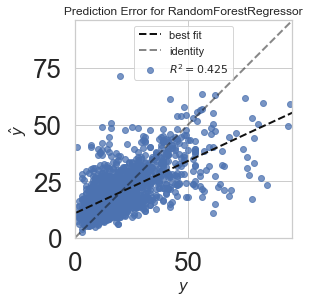

Wall time: 3min 26s


In [57]:
%%time
RF_Base = RandomForest('Random Forest', Basedf, '2018-2019', 0, 0, 7, 12, 0.3, 'None')

['Hour', 'rain', 'temp', 'msl', 'wdsp', 'wddir', 'NO2', 'SO2', 'Ozone', 'CO']
Best CV score = 0.532:
Best parameters:  {'reduce_dim': TruncatedSVD(algorithm='randomized', n_components=10, n_iter=5,
             random_state=None, tol=0.0), 'reduce_dim__n_components': 10}


C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


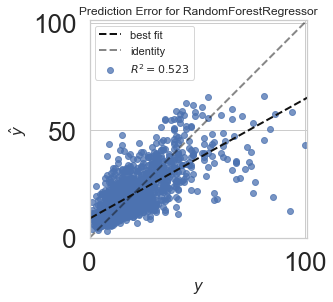

Wall time: 5min 49s


In [58]:
%%time
RF_Pollutant = RandomForest('Random Forest', Pollutantdf, '2018-2019', 0, 0, 10, 12, 0.3, 'NO2, SO2, CO')

['Hour', 'rain', 'temp', 'msl', 'NO2', 'SO2', 'Ozone', 'CO']
Best CV score = 0.501:
Best parameters:  {'reduce_dim': TruncatedSVD(algorithm='randomized', n_components=8, n_iter=5,
             random_state=None, tol=0.0), 'reduce_dim__n_components': 8}


C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


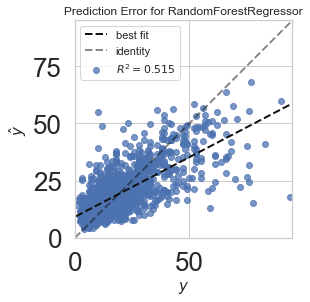

Wall time: 4min 14s


In [59]:
%%time
RF_NOWD = RandomForest('Random Forest', dfnowd, '2018-2019', 0, 0, 8, 12, 0.3, 'NO WIND')

In [76]:
RFTime = ['3m 26s', '5m 49s', '4m 14s']

RFData = pd.concat([RF_Base, RF_Pollutant, RF_NOWD])
RFData['Run Time'] = RFTime 
display(RFData)

Algorithm       Year  N Features  Max Depth  Test-Train Split  \
0  Random Forest  2018-2019           7         12               0.3   
0  Random Forest  2018-2019          10         12               0.3   
0  Random Forest  2018-2019           8         12               0.3   

  Feature Added         MSE       MAE        R2   MEAE      ME Run Time  
0          None  121.894670  7.624066  0.383547  5.280  64.418   3m 26s  
0  NO2, SO2, CO   94.243096  6.620102  0.493072  4.805  80.520   5m 49s  
0       NO WIND   99.405063  6.816733  0.457891  4.835  79.120   4m 14s

['Hour', 'rain', 'temp', 'msl', 'wdsp', 'wddir', 'Ozone']
Best CV score = 0.328:
Best parameters:  {'reduce_dim': PCA(copy=True, iterated_power=7, n_components=7, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), 'reduce_dim__n_components': 7, 'regresson__max_depth': 12}


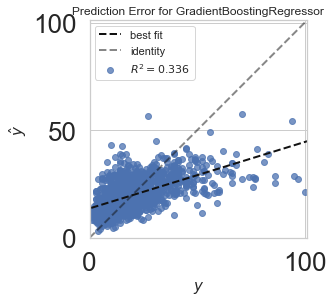

Wall time: 1min 1s


In [61]:
%%time
GB_Base = GradientBoosting('Gradient Boosting', Basedf, '2018-2019', 0, 0, 7, 12, 0.3, 'None')

['Hour', 'rain', 'temp', 'msl', 'wdsp', 'wddir', 'NO2', 'SO2', 'Ozone', 'CO']
Best CV score = 0.464:
Best parameters:  {'reduce_dim': RFE(estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
                  gamma='auto', kernel='linear', max_iter=-1, shrinking=True,
                  tol=0.001, verbose=False),
    n_features_to_select=10, step=1, verbose=0), 'reduce_dim__n_features_to_select': 10, 'regresson__max_depth': 12}


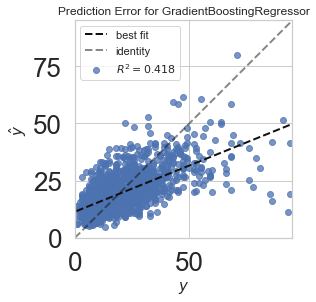

Wall time: 1min 23s


In [62]:
%%time
GB_Pollutant = GradientBoosting('Gradient Boosting', Pollutantdf, '2018-2019', 0, 0, 10, 12, 0.3, 'NO2, SO2, CO')

['Hour', 'rain', 'temp', 'msl', 'NO2', 'SO2', 'Ozone', 'CO']
Best CV score = 0.417:
Best parameters:  {'reduce_dim': RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=8, step=1, verbose=0), 'reduce_dim__n_features_to_select': 8, 'regresson__max_depth': 12}


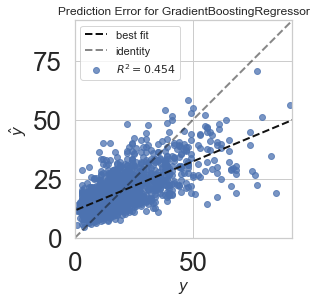

Wall time: 57.6 s


In [63]:
%%time
GB_NOWD = GradientBoosting('Gradient Boosting', dfnowd, '2018-2019', 0, 0, 8, 12, 0.3, 'NO WIND')

In [77]:
GBTime = ['1m 1s', '1m 23s', '58s']

GBData = pd.concat([GB_Base, GB_Pollutant, GB_NOWD])
GBData['Run Time'] = GBTime 
display(GBData)

Algorithm       Year  N Features  Max Depth  Test-Train Split  \
0  Gradient Boosting  2018-2019           7         12               0.3   
0  Gradient Boosting  2018-2019          10         12               0.3   
0  Gradient Boosting  2018-2019           8         12               0.3   

  Feature Added         MSE       MAE        R2      MEAE         ME Run Time  
0          None  126.192397  7.661094  0.323178  5.272208  67.879161    1m 1s  
0  NO2, SO2, CO  101.802665  6.506614  0.455842  4.187607  82.598606   1m 23s  
0       NO WIND  107.519445  7.008613  0.399231  4.751280  67.670763      58s

['Hour', 'rain', 'temp', 'msl', 'wdsp', 'wddir', 'Ozone']


C:\Users\User\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Best CV score = 0.273:
Best parameters:  {'reduce_dim': TruncatedSVD(algorithm='randomized', n_components=7, n_iter=5,
             random_state=None, tol=0.0), 'reduce_dim__n_components': 7}


C:\Users\User\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


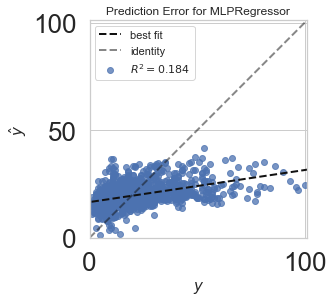

Wall time: 1min 18s


In [65]:
%%time
MLP_Base = ANN('ANN', Basedf, '2018-2019', 0, 0, 7, 0.3, 'None')

['Hour', 'rain', 'temp', 'msl', 'wdsp', 'wddir', 'NO2', 'SO2', 'Ozone', 'CO']


C:\Users\User\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Best CV score = 0.461:
Best parameters:  {'reduce_dim': TruncatedSVD(algorithm='arpack', n_components=10, n_iter=5, random_state=None,
             tol=0.0), 'reduce_dim__n_components': 10}


C:\Users\User\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


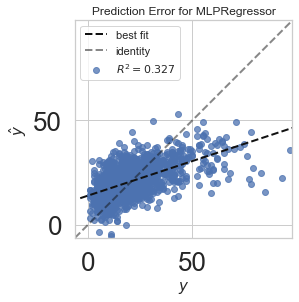

Wall time: 3min 11s


In [66]:
%%time
MLP_Pollutant = ANN('ANN', Pollutantdf, '2018-2019', 0, 0, 10, 0.3, 'NO2, SO2, CO')

['Hour', 'rain', 'temp', 'msl', 'NO2', 'SO2', 'Ozone', 'CO']


C:\Users\User\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Best CV score = 0.404:
Best parameters:  {'reduce_dim': TruncatedSVD(algorithm='randomized', n_components=8, n_iter=5,
             random_state=None, tol=0.0), 'reduce_dim__n_components': 8}


C:\Users\User\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


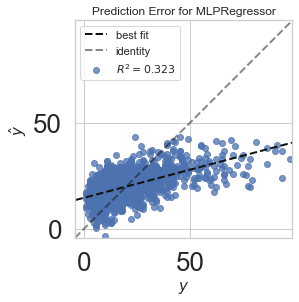

Wall time: 1min 9s


In [67]:
%%time
MLP_NOWD = ANN('ANN', dfnowd, '2017-2019', 0, 0, 8, 0.3, 'NO WIND')

In [78]:
MLPTime = ['1m 18s', '3m 11s', '1m 9s']

MLPData = pd.concat([MLP_Base, MLP_Pollutant, MLP_NOWD])
MLPData['Run Time'] = MLPTime 
display(MLPData)

Algorithm       Year  N Features  Test-Train Split Feature Added  \
0       ANN  2018-2019           7               0.3          None   
0       ANN  2018-2019          10               0.3  NO2, SO2, CO   
0       ANN  2017-2019           8               0.3       NO WIND   

          MSE       MAE        R2      MEAE         ME Run Time  
0  152.263887  8.690357  0.285866  6.387667  73.676564   1m 18s  
0   99.788855  7.134201  0.445254  5.452623  86.056150   3m 11s  
0  118.146988  7.481185  0.439887  5.596379  78.045040    1m 9s

['Hour', 'rain', 'temp', 'msl', 'wdsp', 'wddir', 'Ozone']
Best CV score = 0.108:
Best parameters:  {'reduce_dim': PCA(copy=True, iterated_power=7, n_components=7, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), 'reduce_dim__n_components': 7, 'regresson__normalize': True}


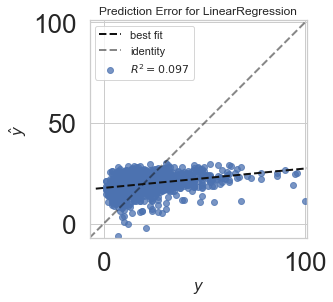

Wall time: 1min 11s


In [69]:
%%time
LR_Base = LRegress('Linear Regression', Basedf, '2018-2019', 0, 0, 7, 0.3, 'None')

['Hour', 'rain', 'temp', 'msl', 'wdsp', 'wddir', 'NO2', 'SO2', 'Ozone', 'CO']
Best CV score = 0.221:
Best parameters:  {'reduce_dim': PCA(copy=True, iterated_power=7, n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), 'reduce_dim__n_components': 10, 'regresson__normalize': True}


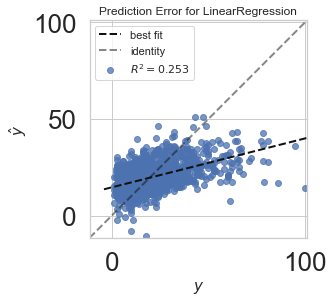

Wall time: 1min 45s


In [70]:
%%time
LR_Pollutant = LRegress('Linear Regression', Pollutantdf, '2018-2019', 0, 0, 10, 0.3, 'NO2, SO2, CO')

['Hour', 'rain', 'temp', 'msl', 'NO2', 'SO2', 'Ozone', 'CO']
Best CV score = 0.215:
Best parameters:  {'reduce_dim': PCA(copy=True, iterated_power=7, n_components=8, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), 'reduce_dim__n_components': 8, 'regresson__normalize': False}


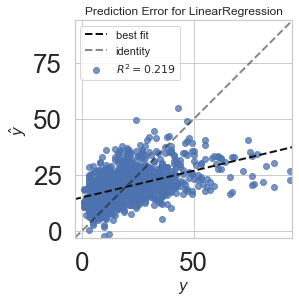

Wall time: 1min 9s


In [71]:
%%time
LR_NOWD = LRegress('Linear Regression', dfnowd, '2018-2019', 0, 0, 8, 0.3, 'NO WIND')

In [79]:
LRTime = ['1m 11s', '1m 45s', '1m 9s']

LRData = pd.concat([LR_Base, LR_Pollutant, LR_NOWD])
LRData['Run Time'] = LRTime 
display(LRData)

Algorithm       Year  N Features  Test-Train Split Feature Added  \
0  Linear Regression  2018-2019           7               0.3          None   
0  Linear Regression  2018-2019          10               0.3  NO2, SO2, CO   
0  Linear Regression  2018-2019           8               0.3       NO WIND   

          MSE       MAE        R2      MEAE         ME Run Time  
0  156.590396  9.154191  0.126413  7.410409  86.945833   1m 11s  
0  140.634758  8.665442  0.255447  6.722068  83.887206   1m 45s  
0  130.127647  8.344753  0.229238  6.576008  72.961198    1m 9s

['Hour', 'rain', 'temp', 'msl', 'wdsp', 'wddir', 'Ozone']


C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Best CV score = 0.190:
Best parameters:  {'reduce_dim': TruncatedSVD(algorithm='arpack', n_components=7, n_iter=5, random_state=None,
             tol=0.0), 'reduce_dim__n_components': 7}


C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


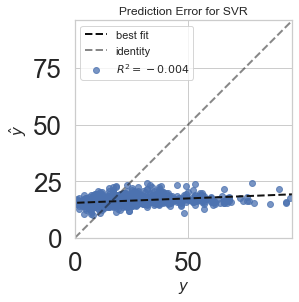

Wall time: 21 s


In [73]:
%%time
SVM_Base = SVM('SVM', Basedf, '2018-2019', 0, 0, 7, 0.3, 'None')

['Hour', 'rain', 'temp', 'msl', 'wdsp', 'wddir', 'NO2', 'SO2', 'Ozone', 'CO']
Best CV score = 0.319:
Best parameters:  {'reduce_dim': FactorAnalysis(copy=True, iterated_power=3, max_iter=1000, n_components=10,
               noise_variance_init=None, random_state=0, svd_method='lapack',
               tol=0.01), 'reduce_dim__n_components': 10}


C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


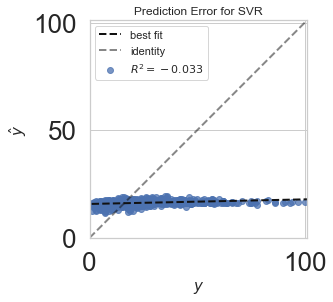

Wall time: 30.1 s


In [74]:
%%time
SVM_Pollutant = SVM('SVM', Pollutantdf, '2018-2019', 0, 0, 10, 0.3, 'NO2, SO2, CO')

['Hour', 'rain', 'temp', 'msl', 'NO2', 'SO2', 'Ozone', 'CO']
Best CV score = 0.312:
Best parameters:  {'reduce_dim': FactorAnalysis(copy=True, iterated_power=3, max_iter=1000, n_components=8,
               noise_variance_init=None, random_state=0,
               svd_method='randomized', tol=0.01), 'reduce_dim__n_components': 8}


C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


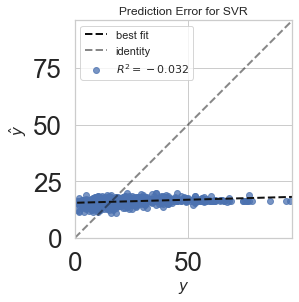

Wall time: 14.5 s


In [75]:
%%time
SVM_NOWD = SVM('SVM', dfnowd, '2018-2019', 0, 0, 8, 0.3, 'NO WIND')

In [80]:
SVMTime = ['21s', '30s', '15s']

SVMData = pd.concat([SVM_Base, SVM_Pollutant, SVM_NOWD])
SVMData['Run Time'] = SVMTime 
display(SVMData)

Algorithm       Year  N Features  Test-Train Split Feature Added  \
0       SVM  2018-2019           7               0.3          None   
0       SVM  2018-2019          10               0.3  NO2, SO2, CO   
0       SVM  2018-2019           8               0.3       NO WIND   

          MSE       MAE        R2      MEAE         ME Run Time  
0  165.933118  8.549101  0.202028  5.844912  83.293246      21s  
0  144.369334  7.910517  0.317284  5.476659  79.030066      30s  
0  126.367275  7.556473  0.304182  5.170962  73.721926      15s

In [81]:
CombinedStats = pd.concat([RFData, GBData, MLPData, LRData, SVMData])

print('PM10 > 100 removed')
display(CombinedStats)
print('PM10 > 100 removed')

PM10 > 100 removed


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


Algorithm Feature Added       MAE         ME      MEAE         MSE  \
0      Random Forest          None  7.624066  64.418000  5.280000  121.894670   
0      Random Forest  NO2, SO2, CO  6.620102  80.520000  4.805000   94.243096   
0      Random Forest       NO WIND  6.816733  79.120000  4.835000   99.405063   
0  Gradient Boosting          None  7.661094  67.879161  5.272208  126.192397   
0  Gradient Boosting  NO2, SO2, CO  6.506614  82.598606  4.187607  101.802665   
0  Gradient Boosting       NO WIND  7.008613  67.670763  4.751280  107.519445   
0                ANN          None  8.690357  73.676564  6.387667  152.263887   
0                ANN  NO2, SO2, CO  7.134201  86.056150  5.452623   99.788855   
0                ANN       NO WIND  7.481185  78.045040  5.596379  118.146988   
0  Linear Regression          None  9.154191  86.945833  7.410409  156.590396   
0  Linear Regression  NO2, SO2, CO  8.665442  83.887206  6.722068  140.634758   
0  Linear Regression       NO WIND  8.344753  72.961198  6.576008  130.127647   
0                SVM          None  8.549101  83.293246  5.844912  165.933118   
0                SVM  NO2, SO2, CO  7.910517  79.030066  5.476659  144.369334   
0                SVM       NO WIND  7.556473  73.721926  5.170962  126.367275   

   Max Depth  N Features        R2 Run Time  Test-Train Split       Year  
0       12.0           7  0.383547   3m 26s               0.3  2018-2019  
0       12.0          10  0.493072   5m 49s               0.3  2018-2019  
0       12.0           8  0.457891   4m 14s               0.3  2018-2019  
0       12.0           7  0.323178    1m 1s               0.3  2018-2019  
0       12.0          10  0.455842   1m 23s               0.3  2018-2019  
0       12.0           8  0.399231      58s               0.3  2018-2019  
0        NaN           7  0.285866   1m 18s               0.3  2018-2019  
0        NaN          10  0.445254   3m 11s               0.3  2018-2019  
0        NaN           8  0.439887    1m 9s               0.3  2017-2019  
0        NaN           7  0.126413   1m 11s               0.3  2018-2019  
0        NaN          10  0.255447   1m 45s               0.3  2018-2019  
0        NaN           8  0.229238    1m 9s               0.3  2018-2019  
0        NaN           7  0.202028      21s               0.3  2018-2019  
0        NaN          10  0.317284      30s               0.3  2018-2019  
0        NaN           8  0.304182      15s               0.3  2018-2019

PM10 > 100 removed


In [82]:
def AlgorithmTable(Data, Name):
    Dataf = Data
    
    Dataf = Dataf[Data['Algorithm'] == Name]
    
    return Dataf
                 
RF = AlgorithmTable(CombinedStats, 'Random Forest')
GB = AlgorithmTable(CombinedStats, 'Gradient Boosting')
MLP = AlgorithmTable(CombinedStats, 'ANN')
LR = AlgorithmTable(CombinedStats, 'Linear Regression')
SVM = AlgorithmTable(CombinedStats, 'SVM')


display(RF)
display(GB)
display(MLP)
display(LR)
display(SVM)

Algorithm Feature Added       MAE      ME   MEAE         MSE  \
0  Random Forest          None  7.624066  64.418  5.280  121.894670   
0  Random Forest  NO2, SO2, CO  6.620102  80.520  4.805   94.243096   
0  Random Forest       NO WIND  6.816733  79.120  4.835   99.405063   

   Max Depth  N Features        R2 Run Time  Test-Train Split       Year  
0       12.0           7  0.383547   3m 26s               0.3  2018-2019  
0       12.0          10  0.493072   5m 49s               0.3  2018-2019  
0       12.0           8  0.457891   4m 14s               0.3  2018-2019

Algorithm Feature Added       MAE         ME      MEAE         MSE  \
0  Gradient Boosting          None  7.661094  67.879161  5.272208  126.192397   
0  Gradient Boosting  NO2, SO2, CO  6.506614  82.598606  4.187607  101.802665   
0  Gradient Boosting       NO WIND  7.008613  67.670763  4.751280  107.519445   

   Max Depth  N Features        R2 Run Time  Test-Train Split       Year  
0       12.0           7  0.323178    1m 1s               0.3  2018-2019  
0       12.0          10  0.455842   1m 23s               0.3  2018-2019  
0       12.0           8  0.399231      58s               0.3  2018-2019

Algorithm Feature Added       MAE         ME      MEAE         MSE  \
0       ANN          None  8.690357  73.676564  6.387667  152.263887   
0       ANN  NO2, SO2, CO  7.134201  86.056150  5.452623   99.788855   
0       ANN       NO WIND  7.481185  78.045040  5.596379  118.146988   

   Max Depth  N Features        R2 Run Time  Test-Train Split       Year  
0        NaN           7  0.285866   1m 18s               0.3  2018-2019  
0        NaN          10  0.445254   3m 11s               0.3  2018-2019  
0        NaN           8  0.439887    1m 9s               0.3  2017-2019

Algorithm Feature Added       MAE         ME      MEAE         MSE  \
0  Linear Regression          None  9.154191  86.945833  7.410409  156.590396   
0  Linear Regression  NO2, SO2, CO  8.665442  83.887206  6.722068  140.634758   
0  Linear Regression       NO WIND  8.344753  72.961198  6.576008  130.127647   

   Max Depth  N Features        R2 Run Time  Test-Train Split       Year  
0        NaN           7  0.126413   1m 11s               0.3  2018-2019  
0        NaN          10  0.255447   1m 45s               0.3  2018-2019  
0        NaN           8  0.229238    1m 9s               0.3  2018-2019

Algorithm Feature Added       MAE         ME      MEAE         MSE  \
0       SVM          None  8.549101  83.293246  5.844912  165.933118   
0       SVM  NO2, SO2, CO  7.910517  79.030066  5.476659  144.369334   
0       SVM       NO WIND  7.556473  73.721926  5.170962  126.367275   

   Max Depth  N Features        R2 Run Time  Test-Train Split       Year  
0        NaN           7  0.202028      21s               0.3  2018-2019  
0        NaN          10  0.317284      30s               0.3  2018-2019  
0        NaN           8  0.304182      15s               0.3  2018-2019

In [1]:
CombinedStats.to_csv('Cork PM>100 Results', index=False)

NameError: name 'CombinedStats' is not defined